In [45]:
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm.notebook import tqdm
import pickle
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = []
image = nib.load('./ADNI_011_S_0010_PET_30_min_3D_FDG_4i_16s__br_raw_20051114113046731_1_S10060_I8664.nii')
dataset.append(np.array(image.get_fdata())[:,:,:,0]/np.array(image.get_fdata())[:,:,:,0].max())
dataset = np.array(dataset)

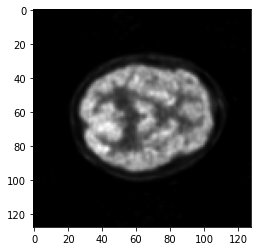

In [3]:
plt.imshow(dataset[0][:,:,32],cmap='gray')
plt.show()

In [4]:
class SuperVoxel():
    '''Class to represent a supervoxel'''
    def __init__(self,intensity,x,y,z):
        self.i = intensity
        self.x = x
        self.y = y
        self.z = z
        self.coord = np.array((x,y,z))
        self.voxels = {}
        
    def update(self,intensity,x,y,z):
        self.i = intensity
        self.x = x
        self.y = y
        self.z = z
        self.coord = np.array((x,y,z))

    def describe(self):
        print("Coordinates: ",self.coord," Intensity: ",self.i, " Voxel Count: ",len(self.voxels))
      
        

In [5]:
def imageConvert(img,clusters):
    image = np.asarray(img).copy()
    for c in tqdm(clusters):
        for x,y,z in c.voxels:
            image[x,y,z]=c.i
    return image

In [6]:
#Importing file
pkl = open('clusters.pkl','rb')

clusters = pickle.load(pkl)

pkl.close()

In [7]:
for c in clusters:
    c.describe()

Coordinates:  [1 1 1]  Intensity:  0.0  Voxel Count:  63
Coordinates:  [1 1 6]  Intensity:  0.0  Voxel Count:  72
Coordinates:  [ 1  1 11]  Intensity:  0.0  Voxel Count:  80
Coordinates:  [ 1  1 16]  Intensity:  0.0  Voxel Count:  66
Coordinates:  [ 1  1 21]  Intensity:  0.0  Voxel Count:  80
Coordinates:  [ 1  1 26]  Intensity:  0.0  Voxel Count:  71
Coordinates:  [ 1  1 31]  Intensity:  0.0  Voxel Count:  77
Coordinates:  [ 1  1 36]  Intensity:  0.0  Voxel Count:  76
Coordinates:  [ 1  1 41]  Intensity:  0.0  Voxel Count:  78
Coordinates:  [ 1  1 46]  Intensity:  0.0  Voxel Count:  80
Coordinates:  [ 1  1 51]  Intensity:  0.0  Voxel Count:  72
Coordinates:  [ 1  1 56]  Intensity:  0.0  Voxel Count:  66
Coordinates:  [ 1  1 60]  Intensity:  0.0  Voxel Count:  62
Coordinates:  [1 5 1]  Intensity:  0.0  Voxel Count:  70
Coordinates:  [1 5 5]  Intensity:  0.0  Voxel Count:  99
Coordinates:  [ 1  5 11]  Intensity:  0.0  Voxel Count:  99
Coordinates:  [ 1  5 15]  Intensity:  0.0  Voxel Cou

Coordinates:  [ 1 70 14]  Intensity:  0.0  Voxel Count:  82
Coordinates:  [ 5 70 20]  Intensity:  0.0  Voxel Count:  113
Coordinates:  [ 4 69 25]  Intensity:  3.051850947599719e-05  Voxel Count:  119
Coordinates:  [ 3 72 30]  Intensity:  6.103701895199438e-05  Voxel Count:  96
Coordinates:  [ 4 69 35]  Intensity:  0.00024414807580797754  Voxel Count:  134
Coordinates:  [ 5 68 40]  Intensity:  0.0  Voxel Count:  60
Coordinates:  [ 1 69 45]  Intensity:  0.0  Voxel Count:  71
Coordinates:  [ 5 69 49]  Intensity:  0.0030823694570757164  Voxel Count:  168
Coordinates:  [ 2 70 54]  Intensity:  0.0014038514358958708  Voxel Count:  144
Coordinates:  [ 4 68 60]  Intensity:  0.0  Voxel Count:  117
Coordinates:  [ 5 75  1]  Intensity:  0.0  Voxel Count:  74
Coordinates:  [ 5 74  5]  Intensity:  0.0  Voxel Count:  96
Coordinates:  [ 5 74 10]  Intensity:  6.103701895199438e-05  Voxel Count:  154
Coordinates:  [ 4 74 15]  Intensity:  0.000793481246375927  Voxel Count:  139
Coordinates:  [ 4 73 22]  

Coordinates:  [14 15 54]  Intensity:  0.0  Voxel Count:  134
Coordinates:  [11 14 59]  Intensity:  0.0  Voxel Count:  89
Coordinates:  [16 20  1]  Intensity:  0.0  Voxel Count:  90
Coordinates:  [15 20  5]  Intensity:  0.0  Voxel Count:  87
Coordinates:  [14 19 11]  Intensity:  0.0  Voxel Count:  121
Coordinates:  [12 18 14]  Intensity:  0.0  Voxel Count:  84
Coordinates:  [17 20 19]  Intensity:  9.155552842799158e-05  Voxel Count:  213
Coordinates:  [12 21 25]  Intensity:  0.0  Voxel Count:  124
Coordinates:  [16 20 32]  Intensity:  0.00012207403790398877  Voxel Count:  98
Coordinates:  [14 18 36]  Intensity:  0.0008545182653279214  Voxel Count:  140
Coordinates:  [15 21 41]  Intensity:  0.0  Voxel Count:  99
Coordinates:  [14 20 45]  Intensity:  0.0013122959074678793  Voxel Count:  105
Coordinates:  [12 17 50]  Intensity:  0.0  Voxel Count:  64
Coordinates:  [11 19 53]  Intensity:  0.002044740134891812  Voxel Count:  122
Coordinates:  [12 18 59]  Intensity:  0.0  Voxel Count:  137
Co

Coordinates:  [18 84  6]  Intensity:  0.0019226660969878231  Voxel Count:  186
Coordinates:  [20 85 11]  Intensity:  9.155552842799158e-05  Voxel Count:  145
Coordinates:  [19 84 15]  Intensity:  0.00021362956633198035  Voxel Count:  89
Coordinates:  [16 85 17]  Intensity:  0.0009765923032319102  Voxel Count:  100
Coordinates:  [19 88 24]  Intensity:  0.0005493331705679495  Voxel Count:  124
Coordinates:  [21 84 30]  Intensity:  0.0  Voxel Count:  127
Coordinates:  [20 85 35]  Intensity:  0.0  Voxel Count:  161
Coordinates:  [21 85 41]  Intensity:  0.0  Voxel Count:  112
Coordinates:  [18 85 46]  Intensity:  0.0  Voxel Count:  169
Coordinates:  [22 84 49]  Intensity:  0.0  Voxel Count:  105
Coordinates:  [20 86 55]  Intensity:  0.0  Voxel Count:  129
Coordinates:  [19 84 59]  Intensity:  0.00012207403790398877  Voxel Count:  171
Coordinates:  [18 88  2]  Intensity:  0.0  Voxel Count:  0
Coordinates:  [18 90  4]  Intensity:  0.0  Voxel Count:  77
Coordinates:  [19 90 14]  Intensity:  0.

Coordinates:  [28 52  1]  Intensity:  0.006439405499435408  Voxel Count:  124
Coordinates:  [29 48  5]  Intensity:  3.051850947599719e-05  Voxel Count:  0
Coordinates:  [27 49  9]  Intensity:  0.009979552598651083  Voxel Count:  164
Coordinates:  [28 54 15]  Intensity:  0.0024414807580797754  Voxel Count:  133
Coordinates:  [30 50 19]  Intensity:  0.07467879268776513  Voxel Count:  164
Coordinates:  [28 49 25]  Intensity:  0.008392590105899229  Voxel Count:  158
Coordinates:  [31 52 31]  Intensity:  0.07141331217383343  Voxel Count:  155
Coordinates:  [29 51 35]  Intensity:  0.08270516067995239  Voxel Count:  101
Coordinates:  [29 49 39]  Intensity:  0.04229865413373211  Voxel Count:  118
Coordinates:  [27 48 45]  Intensity:  6.103701895199438e-05  Voxel Count:  161
Coordinates:  [28 52 51]  Intensity:  0.003631702627643666  Voxel Count:  133
Coordinates:  [24 49 58]  Intensity:  0.0007324442274239326  Voxel Count:  103
Coordinates:  [28 49 58]  Intensity:  0.000640888698995941  Voxel 

Coordinates:  [39 12 56]  Intensity:  6.103701895199438e-05  Voxel Count:  144
Coordinates:  [38 10 61]  Intensity:  0.0  Voxel Count:  72
Coordinates:  [43 12  2]  Intensity:  9.155552842799158e-05  Voxel Count:  124
Coordinates:  [39 14  4]  Intensity:  0.0  Voxel Count:  141
Coordinates:  [38 11  9]  Intensity:  0.0031128879665517136  Voxel Count:  159
Coordinates:  [36 15 17]  Intensity:  0.0  Voxel Count:  99
Coordinates:  [38 13 19]  Intensity:  0.0  Voxel Count:  125
Coordinates:  [38 15 25]  Intensity:  0.0  Voxel Count:  142
Coordinates:  [41 15 30]  Intensity:  0.0  Voxel Count:  136
Coordinates:  [40 15 35]  Intensity:  0.0  Voxel Count:  122
Coordinates:  [41 15 41]  Intensity:  0.0  Voxel Count:  124
Coordinates:  [38 13 44]  Intensity:  0.0  Voxel Count:  121
Coordinates:  [39 15 49]  Intensity:  0.0  Voxel Count:  155
Coordinates:  [40 13 58]  Intensity:  0.0  Voxel Count:  0
Coordinates:  [37 14 58]  Intensity:  0.0  Voxel Count:  79
Coordinates:  [41 21  1]  Intensity:

Coordinates:  [ 41 105  42]  Intensity:  0.0007629627368999298  Voxel Count:  115
Coordinates:  [ 44 104  49]  Intensity:  0.000640888698995941  Voxel Count:  152
Coordinates:  [ 44 104  55]  Intensity:  0.0  Voxel Count:  76
Coordinates:  [ 43 105  58]  Intensity:  6.103701895199438e-05  Voxel Count:  84
Coordinates:  [ 42 110   1]  Intensity:  0.08600115970336009  Voxel Count:  88
Coordinates:  [ 42 109   7]  Intensity:  0.02447584459974975  Voxel Count:  167
Coordinates:  [ 45 111  11]  Intensity:  0.0445265053254799  Voxel Count:  135
Coordinates:  [ 43 109  14]  Intensity:  0.015350810266426589  Voxel Count:  162
Coordinates:  [ 42 110  20]  Intensity:  0.0008545182653279214  Voxel Count:  157
Coordinates:  [ 43 111  26]  Intensity:  0.0020142216254158147  Voxel Count:  156
Coordinates:  [ 40 110  28]  Intensity:  3.051850947599719e-05  Voxel Count:  103
Coordinates:  [ 44 109  35]  Intensity:  0.0  Voxel Count:  97
Coordinates:  [ 43 108  39]  Intensity:  0.0  Voxel Count:  105
C

Coordinates:  [52 69 37]  Intensity:  0.26279488509781185  Voxel Count:  37
Coordinates:  [52 71 41]  Intensity:  0.20465712454603718  Voxel Count:  103
Coordinates:  [55 70 44]  Intensity:  0.2150639362773522  Voxel Count:  115
Coordinates:  [55 68 47]  Intensity:  0.2508011108737449  Voxel Count:  125
Coordinates:  [53 70 54]  Intensity:  0.39722891933957943  Voxel Count:  135
Coordinates:  [54 70 59]  Intensity:  0.049958800012207406  Voxel Count:  103
Coordinates:  [53 74  1]  Intensity:  0.09070101016266366  Voxel Count:  94
Coordinates:  [53 74  5]  Intensity:  0.1368755149998474  Voxel Count:  137
Coordinates:  [52 74  9]  Intensity:  0.12619403668324838  Voxel Count:  105
Coordinates:  [54 75 15]  Intensity:  0.18100527970213934  Voxel Count:  128
Coordinates:  [54 75 22]  Intensity:  0.22345652638325145  Voxel Count:  116
Coordinates:  [53 73 25]  Intensity:  0.21979430524613178  Voxel Count:  87
Coordinates:  [54 75 29]  Intensity:  0.5534531693472091  Voxel Count:  150
Coord

Coordinates:  [63 33 31]  Intensity:  0.6514786217841121  Voxel Count:  0
Coordinates:  [65 35 32]  Intensity:  0.738883632923368  Voxel Count:  154
Coordinates:  [65 35 38]  Intensity:  0.4768517105624561  Voxel Count:  213
Coordinates:  [61 33 47]  Intensity:  0.01467940305795465  Voxel Count:  104
Coordinates:  [63 34 47]  Intensity:  0.004638813440351573  Voxel Count:  63
Coordinates:  [62 31 53]  Intensity:  0.0004577776421399579  Voxel Count:  129
Coordinates:  [64 36 59]  Intensity:  0.0003357036042359691  Voxel Count:  163
Coordinates:  [61 43  0]  Intensity:  0.0026245918149357585  Voxel Count:  47
Coordinates:  [63 40  2]  Intensity:  0.09521774956511124  Voxel Count:  112
Coordinates:  [63 39 10]  Intensity:  0.04617450483718375  Voxel Count:  168
Coordinates:  [64 40 14]  Intensity:  0.27552110354930265  Voxel Count:  106
Coordinates:  [65 40 20]  Intensity:  0.2870571001312296  Voxel Count:  81
Coordinates:  [63 41 26]  Intensity:  0.6697286904507583  Voxel Count:  89
Coor

Coordinates:  [76  1 20]  Intensity:  0.000946073793755913  Voxel Count:  99
Coordinates:  [72  1 25]  Intensity:  0.0  Voxel Count:  108
Coordinates:  [71  0 31]  Intensity:  0.0  Voxel Count:  63
Coordinates:  [72  0 37]  Intensity:  0.004791405987731559  Voxel Count:  74
Coordinates:  [74  2 42]  Intensity:  0.0012512588885158849  Voxel Count:  151
Coordinates:  [72  0 46]  Intensity:  0.0017090365306558428  Voxel Count:  67
Coordinates:  [72  1 51]  Intensity:  0.0  Voxel Count:  68
Coordinates:  [75  1 55]  Intensity:  0.002868739890743736  Voxel Count:  74
Coordinates:  [71  1 56]  Intensity:  0.0004882961516159551  Voxel Count:  101
Coordinates:  [74  7  1]  Intensity:  0.0011902218695638905  Voxel Count:  93
Coordinates:  [74  4  4]  Intensity:  0.0010071108127079073  Voxel Count:  135
Coordinates:  [74  6  9]  Intensity:  3.051850947599719e-05  Voxel Count:  109
Coordinates:  [74  5 15]  Intensity:  0.000640888698995941  Voxel Count:  154
Coordinates:  [75  4 22]  Intensity:  

Coordinates:  [78 94  9]  Intensity:  0.026123844111453597  Voxel Count:  108
Coordinates:  [78 96 16]  Intensity:  0.07486190374462111  Voxel Count:  142
Coordinates:  [79 93 21]  Intensity:  0.09860530411694693  Voxel Count:  142
Coordinates:  [77 93 25]  Intensity:  0.07107760856959747  Voxel Count:  147
Coordinates:  [77 94 30]  Intensity:  0.575762199774163  Voxel Count:  122
Coordinates:  [79 95 36]  Intensity:  0.6617328409680471  Voxel Count:  145
Coordinates:  [76 92 40]  Intensity:  0.6422925504318369  Voxel Count:  95
Coordinates:  [79 95 46]  Intensity:  0.13016144291512802  Voxel Count:  180
Coordinates:  [78 94 50]  Intensity:  0.031189916684469132  Voxel Count:  99
Coordinates:  [79 94 55]  Intensity:  0.0017700735496078372  Voxel Count:  114
Coordinates:  [81 97 59]  Intensity:  0.0010071108127079073  Voxel Count:  94
Coordinates:  [ 76 101   1]  Intensity:  0.07516708883938109  Voxel Count:  104
Coordinates:  [80 99  3]  Intensity:  0.018219550157170323  Voxel Count:  

Coordinates:  [88 62 40]  Intensity:  0.5262306588946196  Voxel Count:  128
Coordinates:  [86 64 45]  Intensity:  0.5932187871944334  Voxel Count:  124
Coordinates:  [89 65 49]  Intensity:  0.1892757957701346  Voxel Count:  171
Coordinates:  [91 64 57]  Intensity:  0.0022583697012237922  Voxel Count:  114
Coordinates:  [89 63 60]  Intensity:  0.00015259254737998596  Voxel Count:  117
Coordinates:  [87 69  1]  Intensity:  0.12076174199652089  Voxel Count:  108
Coordinates:  [90 68  5]  Intensity:  0.07126071962645344  Voxel Count:  126
Coordinates:  [90 71 10]  Intensity:  0.1467329935605945  Voxel Count:  130
Coordinates:  [89 69 16]  Intensity:  0.04770043031098361  Voxel Count:  122
Coordinates:  [88 68 20]  Intensity:  0.47849971007416  Voxel Count:  113
Coordinates:  [91 69 26]  Intensity:  0.48213141270180365  Voxel Count:  133
Coordinates:  [89 70 30]  Intensity:  0.4846949674977874  Voxel Count:  147
Coordinates:  [89 70 35]  Intensity:  0.4824365977965636  Voxel Count:  185
Coo

Coordinates:  [97 48 45]  Intensity:  0.0007019257179479354  Voxel Count:  133
Coordinates:  [98 49 50]  Intensity:  0.009277626880703146  Voxel Count:  128
Coordinates:  [99 51 55]  Intensity:  0.0  Voxel Count:  119
Coordinates:  [101  49  58]  Intensity:  0.001098666341135899  Voxel Count:  87
Coordinates:  [97 53  1]  Intensity:  0.0009155552842799158  Voxel Count:  103
Coordinates:  [101  53   3]  Intensity:  0.0  Voxel Count:  79
Coordinates:  [99 55 11]  Intensity:  0.0013733329264198737  Voxel Count:  73
Coordinates:  [100  50  14]  Intensity:  0.00024414807580797754  Voxel Count:  120
Coordinates:  [100  56  20]  Intensity:  0.015076143681142613  Voxel Count:  192
Coordinates:  [101  52  24]  Intensity:  0.0017090365306558428  Voxel Count:  181
Coordinates:  [107  51  28]  Intensity:  6.103701895199438e-05  Voxel Count:  91
Coordinates:  [101  53  32]  Intensity:  0.0043641468550675985  Voxel Count:  137
Coordinates:  [101  53  39]  Intensity:  0.0  Voxel Count:  94
Coordinate

Coordinates:  [109  20  10]  Intensity:  0.0  Voxel Count:  123
Coordinates:  [108  22  15]  Intensity:  3.051850947599719e-05  Voxel Count:  123
Coordinates:  [110  20  20]  Intensity:  0.0  Voxel Count:  135
Coordinates:  [110  21  26]  Intensity:  0.0  Voxel Count:  108
Coordinates:  [109  19  29]  Intensity:  0.0  Voxel Count:  94
Coordinates:  [110  20  35]  Intensity:  0.0  Voxel Count:  147
Coordinates:  [109  19  40]  Intensity:  0.0  Voxel Count:  145
Coordinates:  [107  17  45]  Intensity:  6.103701895199438e-05  Voxel Count:  166
Coordinates:  [110  19  51]  Intensity:  3.051850947599719e-05  Voxel Count:  169
Coordinates:  [106  18  55]  Intensity:  0.0005493331705679495  Voxel Count:  205
Coordinates:  [109  19  60]  Intensity:  0.0  Voxel Count:  82
Coordinates:  [108  24   1]  Intensity:  0.00015259254737998596  Voxel Count:  104
Coordinates:  [108  24   5]  Intensity:  0.0  Voxel Count:  93
Coordinates:  [109  24  11]  Intensity:  0.0  Voxel Count:  109
Coordinates:  [1

Coordinates:  [120  10  35]  Intensity:  0.0  Voxel Count:  138
Coordinates:  [116  11  42]  Intensity:  0.0  Voxel Count:  104
Coordinates:  [120  10  44]  Intensity:  0.0  Voxel Count:  173
Coordinates:  [119   9  50]  Intensity:  0.0  Voxel Count:  121
Coordinates:  [120  11  55]  Intensity:  0.0  Voxel Count:  147
Coordinates:  [121   8  60]  Intensity:  0.0  Voxel Count:  97
Coordinates:  [118  14   1]  Intensity:  0.0  Voxel Count:  79
Coordinates:  [118  15   5]  Intensity:  0.0  Voxel Count:  118
Coordinates:  [119  14  11]  Intensity:  0.0  Voxel Count:  109
Coordinates:  [120  15  16]  Intensity:  0.0  Voxel Count:  120
Coordinates:  [120  14  21]  Intensity:  0.0  Voxel Count:  130
Coordinates:  [121  15  26]  Intensity:  0.0  Voxel Count:  112
Coordinates:  [121  15  30]  Intensity:  0.0  Voxel Count:  98
Coordinates:  [119  14  34]  Intensity:  0.0  Voxel Count:  99
Coordinates:  [121  15  40]  Intensity:  0.0  Voxel Count:  166
Coordinates:  [120  15  46]  Intensity:  0.0

Coordinates:  [124 110  19]  Intensity:  0.0  Voxel Count:  145
Coordinates:  [123 109  25]  Intensity:  0.0003357036042359691  Voxel Count:  163
Coordinates:  [124 109  30]  Intensity:  0.0  Voxel Count:  117
Coordinates:  [124 110  35]  Intensity:  0.0  Voxel Count:  114
Coordinates:  [125 110  40]  Intensity:  3.051850947599719e-05  Voxel Count:  146
Coordinates:  [125 110  45]  Intensity:  6.103701895199438e-05  Voxel Count:  140
Coordinates:  [124 111  50]  Intensity:  0.0  Voxel Count:  139
Coordinates:  [124 109  54]  Intensity:  0.0  Voxel Count:  118
Coordinates:  [125 108  59]  Intensity:  0.0  Voxel Count:  175
Coordinates:  [126 116   1]  Intensity:  0.0  Voxel Count:  53
Coordinates:  [124 116   6]  Intensity:  0.0  Voxel Count:  138
Coordinates:  [125 116  11]  Intensity:  0.0  Voxel Count:  124
Coordinates:  [125 116  15]  Intensity:  0.0  Voxel Count:  109
Coordinates:  [125 115  21]  Intensity:  0.0  Voxel Count:  155
Coordinates:  [125 114  26]  Intensity:  0.0  Voxel

In [8]:
converted = imageConvert(dataset[0],clusters)

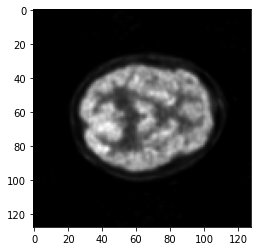

In [9]:
plt.imshow(dataset[0][:,:,32],cmap='gray')
plt.show()

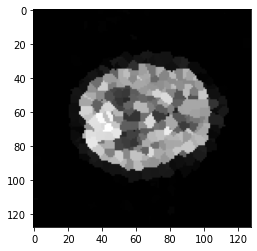

In [10]:
plt.imshow(converted[:,:,32],cmap='gray')
plt.show()

In [179]:
## Converting clusters to a datset
c_dataset = []

for c in clusters:
    c_dataset.append([c.i])
    
c_dataset = np.array(c_dataset)

In [180]:
scaled_dataset = c_dataset

In [181]:
#Scaling 
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(c_dataset)

In [182]:
scaled_dataset[:10,:]

array([[-0.41088264],
       [-0.41088264],
       [-0.41088264],
       [-0.41088264],
       [-0.41088264],
       [-0.41088264],
       [-0.41088264],
       [-0.41088264],
       [-0.41088264],
       [-0.41088264]])

## K Means Clustering

In [183]:
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering

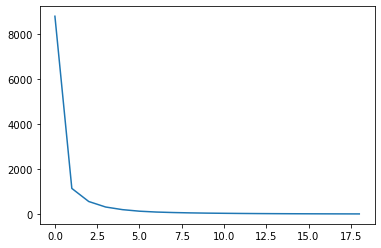

In [184]:
wcss = []
for i in range(1,20):
    k_clusters = KMeans(n_clusters=i)
    k_clusters.fit(scaled_dataset)
    wcss.append(k_clusters.inertia_)

plt.plot(wcss)
plt.show()
    

In [206]:
n_clusters = 5

In [207]:
k_clusters = KMeans(n_clusters=n_clusters)
k_clusters.fit(scaled_dataset)

KMeans(n_clusters=5)

In [208]:
lables = k_clusters.predict(scaled_dataset)

In [209]:
#Creating Segments
segments = []
shape = dataset[0].shape
for i in range(n_clusters):
    blank = np.zeros(shape)
    for c in np.array(clusters)[lables==i]:
        #blank[c.coord]=1.0
        for v in c.voxels.keys():
            blank[v] = 1.0
            
    
    segments.append(blank)

segments = np.array(segments)

In [210]:
level =36

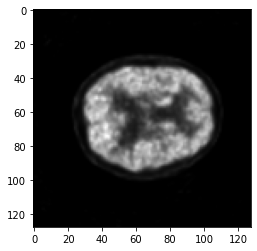

In [211]:
plt.imshow(dataset[0][:,:,level],cmap='gray')
plt.show()

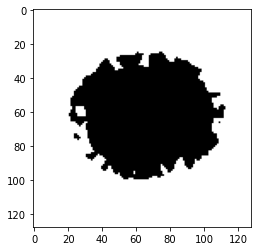

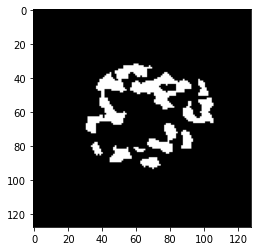

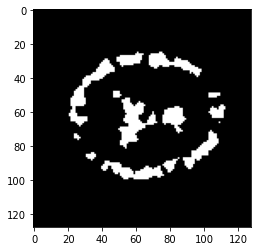

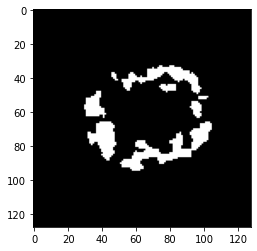

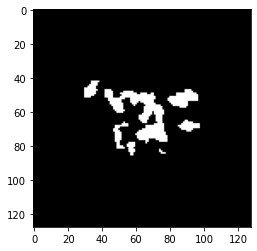

In [212]:
for seg in segments:
    plt.imshow(seg[:,:,level],cmap='gray')
    plt.show()

In [213]:
for i in set(lables):

    s = 0
    cnt = 0
    for c in np.array(clusters)[lables==i]:
        cnt += len(c.voxels.keys())
        for v in c.voxels.keys():
            s += dataset[0][v]
    print("For cluster ",i," mean = ",s/cnt)
            

For cluster  0  mean =  0.006192153108463019
For cluster  1  mean =  0.45759041874176604
For cluster  2  mean =  0.10256408574951875
For cluster  3  mean =  0.5457606191653908
For cluster  4  mean =  0.2883148188300864


## Attempt with DBScan

dbscan = DBSCAN(eps=0.44,min_samples=15)
lables = dbscan.fit_predict(scaled_dataset)

In [245]:
dbscan = DBSCAN(eps=0.006,min_samples=13)
lables = dbscan.fit_predict(scaled_dataset)

In [246]:
len(set(lables))

8

In [247]:
#Creating Segments
segments = []
shape = dataset[0].shape
for i in set(lables):
    blank = np.zeros(shape)
    for c in np.array(clusters)[lables==i]:
        #blank[c.coord]=1.0
        for v in c.voxels.keys():
            blank[v] = 1.0
            
    
    segments.append(blank)

segments = np.array(segments)

In [248]:
level = 36

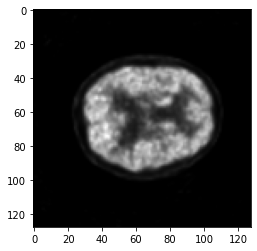

In [249]:
plt.imshow(dataset[0][:,:,level],cmap='gray')
plt.show()

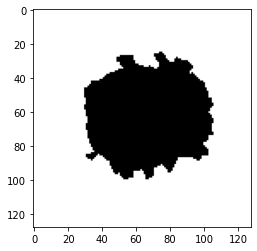

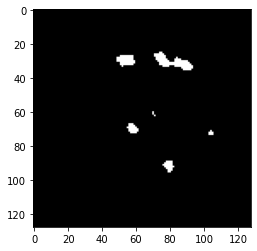

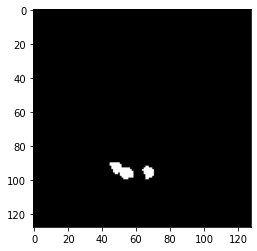

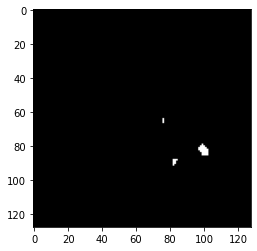

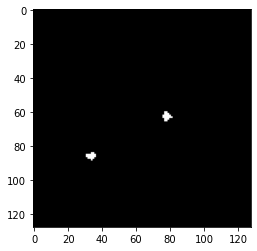

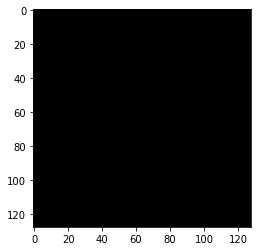

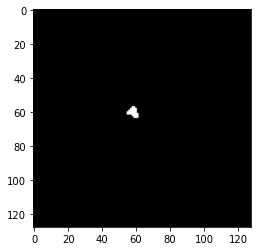

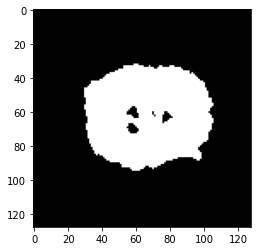

In [250]:
for seg in segments:
    plt.imshow(seg[:,:,level],cmap='gray')
    plt.show()

In [135]:
for i in set(lables):

    s = 0
    cnt = 0
    for c in np.array(clusters)[lables==i]:
        cnt += len(c.voxels.keys())
        for v in c.voxels.keys():
            s += dataset[0][v]
    print("For cluster ",i," mean = ",s/cnt)
            

For cluster  0  mean =  0.021576092076507684
For cluster  1  mean =  0.4645604343667271
For cluster  2  mean =  0.4624677006298367
For cluster  3  mean =  0.6321837483578332
For cluster  -1  mean =  0.42913837249465075


In [136]:
lis = []
for i in range(63):
    lis.append(np.moveaxis(np.array([segments[2,:,:,i],segments[1,:,:,i],segments[0,:,:,3]+segments[0,:,:,4]]),0,2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


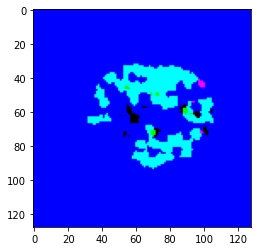

In [137]:
plt.imshow(lis[36])

## Trying Spectral Clustering

In [331]:
n_clusters = 4

In [ ]:
sc = SpectralClustering(n_clusters=n_clusters)
lables = sc.fit_predict(scaled_dataset)

In [275]:
#Creating Segments
segments = []
shape = dataset[0].shape
for i in range(n_clusters):
    blank = np.zeros(shape)
    for c in np.array(clusters)[lables==i]:
        #blank[c.coord]=1.0
        for v in c.voxels.keys():
            blank[v] = 1.0
            
    
    segments.append(blank)

segments = np.array(segments)

In [325]:
level = 33

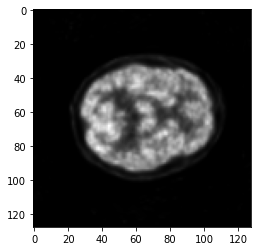

In [326]:
plt.imshow(dataset[0][:,:,level],cmap='gray')
plt.show()

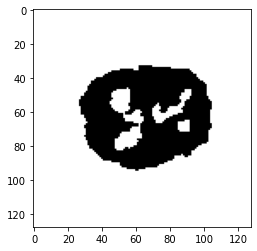

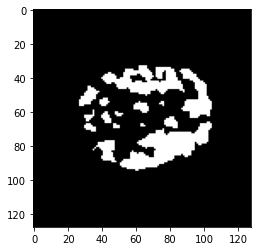

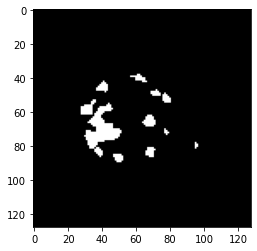

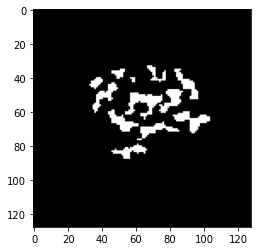

In [327]:
for seg in segments:
    plt.imshow(seg[:,:,level],cmap='gray')
    plt.show()

In [328]:
for i in set(lables):

    s = 0
    cnt = 0
    for c in np.array(clusters)[lables==i]:
        cnt += len(c.voxels.keys())
        for v in c.voxels.keys():
            s += dataset[0][v]
    print("For cluster ",i," mean = ",s/cnt)
            

For cluster  0  mean =  0.021629909482547865
For cluster  1  mean =  0.5014024156222748
For cluster  2  mean =  0.6142040848792715
For cluster  3  mean =  0.3792710902990183


In [329]:
lis = []
for i in range(63):
    lis.append(np.moveaxis(np.array([segments[2,:,:,i],segments[1,:,:,i],segments[3,:,:,i]]),0,2))

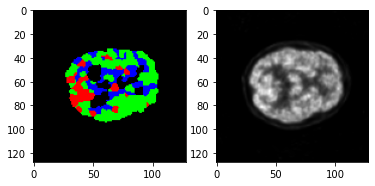

In [330]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(lis[level])
ax2.imshow(dataset[0][:,:,level],cmap='gray')